<a href="https://colab.research.google.com/github/spmani99/data-analysis-projects/blob/main/mean_profit_by_market_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean profit of each item category per market

In [ ]:
!pip install pyspark

In [ ]:
import pyspark
import matplotlib.pyplot as plt
from pyspark import SparkContext
from pyspark.sql import SparkSession, SQLContext
from datetime import datetime, date
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
from pyspark.sql import SQLContext
from pyspark.sql.functions import mean

In [ ]:
spark= SparkSession.builder.getOrCreate()
df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/DataCoSupplyChainDataset.csv")
df.show(5)

+--------+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+-----------+--------------+-------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+--------------------+----------------+-------------+---------------+-----------+------------+------------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+-------------+---------------+-------------------+-------------------+--------------------+------------+-------------+--------------+--------------------------+--------------+
|    Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sales per c

In [ ]:
market_category_counts = df.groupBy("Market", "Category Name").count()

total_rows = market_category_counts.count()
market_category_counts.orderBy("Market").show(total_rows)

+------------+--------------------+-----+
|      Market|       Category Name|count|
+------------+--------------------+-----+
|        NULL|    Camping & Hiking|    1|
|      Africa|      Men's Footwear|   21|
|      Africa|    Cardio Equipment|   24|
|      Africa|       Shop By Sport|   20|
|      Africa| Baseball & Softball|    1|
|      Africa|    Camping & Hiking|   15|
|      Africa|    Tennis & Racquet|    2|
|      Africa|          Golf Balls|    1|
|      Africa|  Hunting & Shooting|    1|
|      Africa|              Hockey|   34|
|      Africa|         Electronics|    7|
|      Africa|        Boxing & MMA|    1|
|      Africa|            Trade-In|    4|
|      Africa|      Girls' Apparel|    3|
|      Africa|         Accessories|    6|
|      Africa|     Women's Apparel|   43|
|      Africa|              Cleats|   37|
|      Europe|                DVDs|    7|
|      Europe|                CDs |    3|
|      Europe|  Hunting & Shooting|    5|
|      Europe|    Kids' Golf Clubs

In [ ]:
from pyspark.sql.functions import mean, col

# Remove null values from the DataFrame
cleaned_df = df.na.drop(subset=["Market", "Category Name", "Order Profit Per Order"])

mean_profit_per_category_per_market = cleaned_df.groupBy("Market", "Category Name") \
                                               .agg(mean("Order Profit Per Order").alias("Mean profit of each item category per market"))

mean_profit_per_category_per_market.orderBy("Market").show(total_rows)


+------------+--------------------+--------------------------------------------+
|      Market|       Category Name|Mean profit of each item category per market|
+------------+--------------------+--------------------------------------------+
|      Africa|      Men's Footwear|                           35.63904728166666|
|      Africa|    Cardio Equipment|                           6.692916795000005|
|      Africa|       Shop By Sport|                           34.36250045340001|
|      Africa| Baseball & Softball|                                      -29.25|
|      Africa|    Camping & Hiking|                                -9.380665964|
|      Africa|    Tennis & Racquet|                                 72.10500145|
|      Africa|          Golf Balls|                                 27.54000092|
|      Africa|  Hunting & Shooting|                                 53.97999954|
|      Africa|              Hockey|                          12.812941108500002|
|      Africa|         Elect

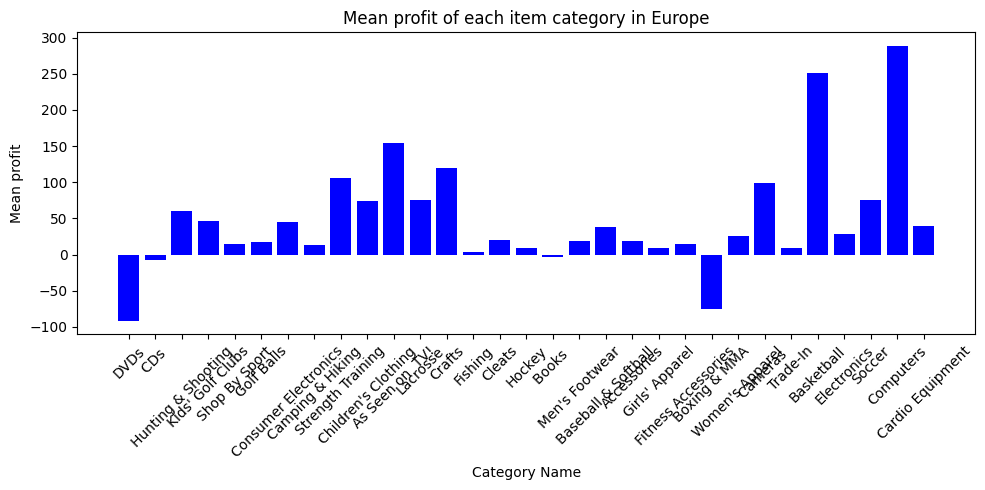

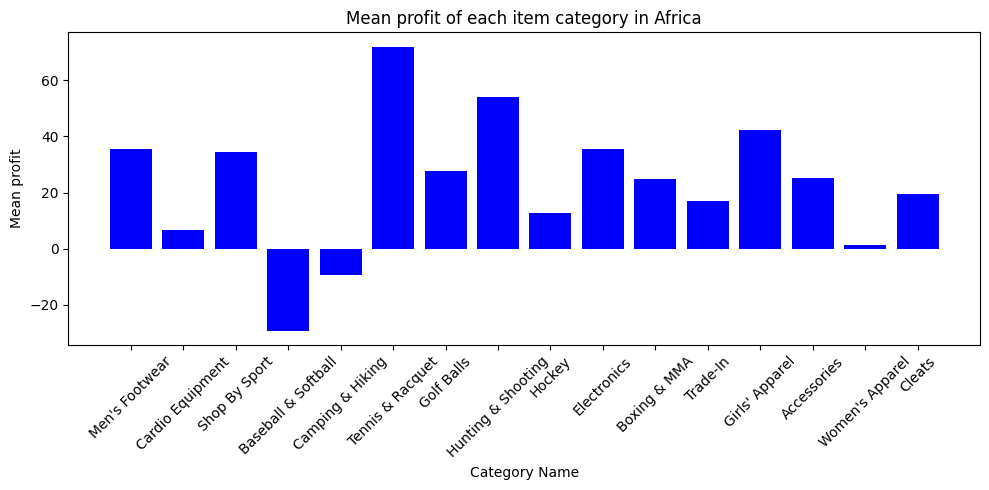

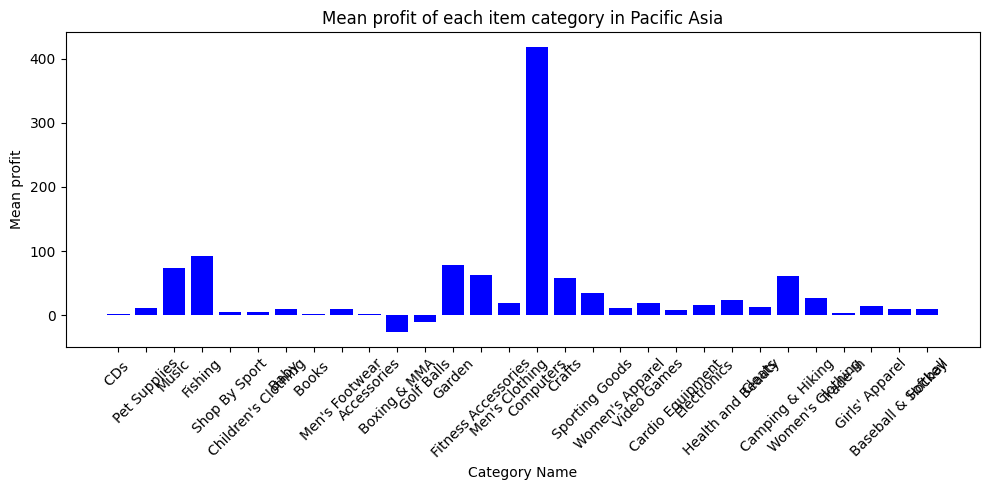

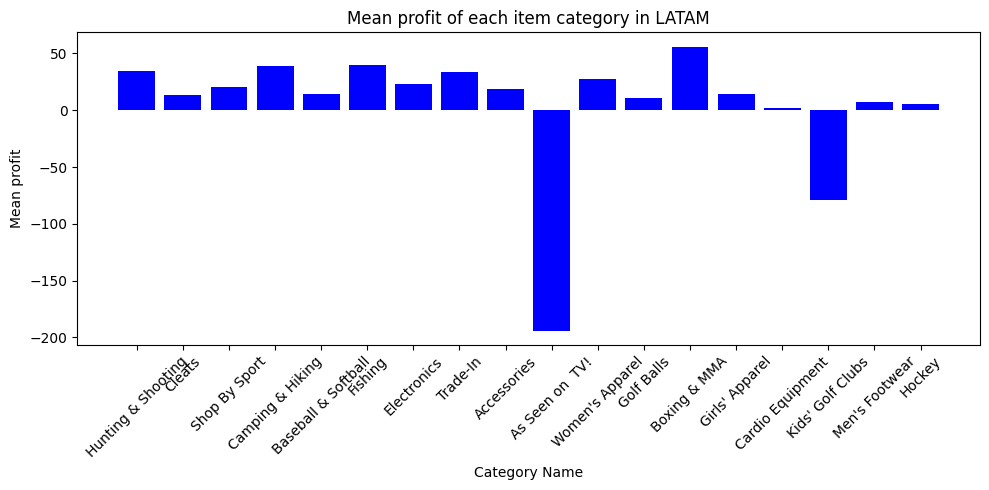

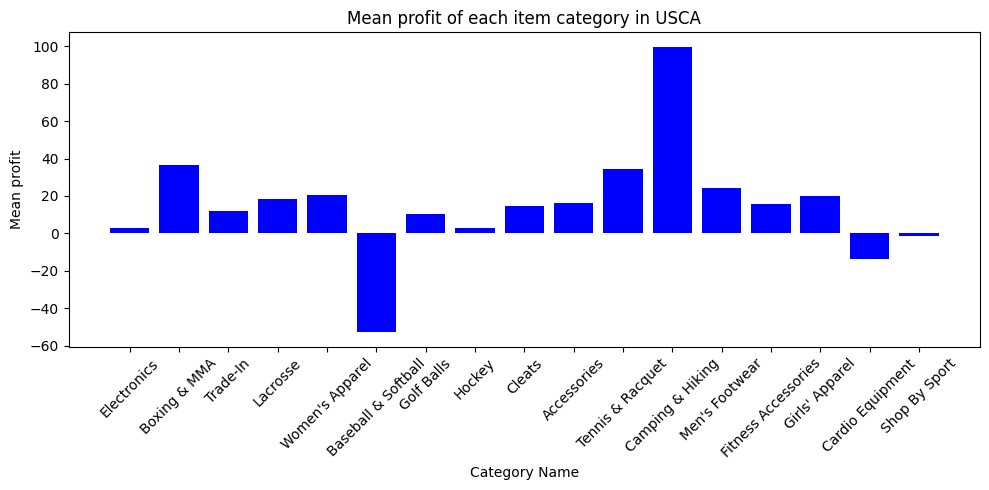

In [ ]:
import matplotlib.pyplot as plt

markets = mean_profit_per_category_per_market.select("Market").distinct().rdd.flatMap(lambda x: x).collect()

for market in markets:
    market_data = mean_profit_per_category_per_market.filter(mean_profit_per_category_per_market["Market"] == market)
    categories = market_data.select("Category Name").rdd.flatMap(lambda x: x).collect()
    mean_profits = market_data.select("Mean profit of each item category per market").rdd.flatMap(lambda x: x).collect()

    plt.figure(figsize=(10, 5))
    plt.bar(categories, mean_profits, color='blue')
    plt.xlabel('Category Name')
    plt.ylabel('Mean profit')
    plt.title(f'Mean profit of each item category in {market}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()